# Open Street Map - Skapa vägkartor 1

[Open Street Map](https://www.openstreetmap.org/) (OSM) är en öppen kartservice, som användaren själv kan skapa kartor ifrån. Eftersom OSM är ett öppet projekt kan innehållet användas fritt både för privat och kommersiellt bruk. Med hjälp av python kan vi använda OSM genom funktionspaketet [osmnx](https://osmnx.readthedocs.io/en/stable/index.html). Från OSM kan man få positionsinformation för vägnät, byggnader, parker, restauranger, etc.

I denna övning bekantar vi oss med osmnx-paketet, vi hämtar in platsinformation för vägnätet inom en radie från Vasa centrum (torget), och ritar in vägnätet på en karta. Vi behöver också funktionspaketet [matplotlib](https://matplotlib.org/) för att skapa grafer/kartor.

Om du ska köra dena Notebook lokalt på din dator, behöver du ha **osmnx** och **matplotlib** tillgängliga. Matplotlib ingår redan om du har installerat Anaconda, men osmnx behöver installeras.

Öppna **Anaconda prompt** och skriv in ``conda install osmnx``.
När du har installerat funktionspaketet kan du köra cellen nedan.

In [12]:
import osmnx as ox  # osmnx låter oss hämta kartdata
import matplotlib.pyplot as plt  # matplotlib låter oss rita diagram, och i detta fall, kartor.

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vi bestämmer en adress som vi vill utgå ifrån. Vi bestämmer också ett avstånd.

Vi undersöker vägnätet inom en halv kilometer från Vasa torg.

In [20]:
# Vi bestämmer adress och avstånd, och sparar värdena som variabler "address" och "distance"

address = "Ylätori, 65100, Vaasa, Finland"
distance = 500     # enheten är meter

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nu kan vi hämta informationen som behövs med funktionen [`ox.graph_from_address()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address). När vi har hämtat infromationen kan vi rita kartan med [`ox.plot_graph()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph)-funktionen.


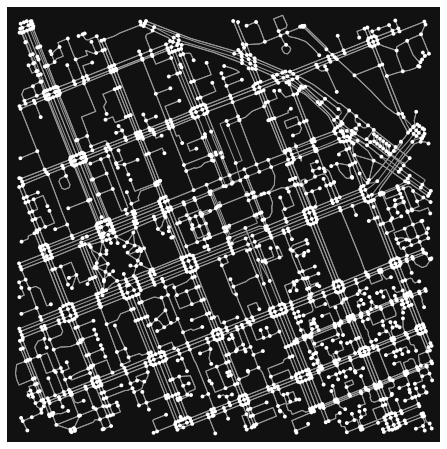

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [21]:
# Vi hämtar in vägdata genom att ange adress och avstånd.
graph = ox.graph_from_address(address, dist=distance)

# Vi ritar ut vägnätet
ox.plot_graph(graph)

Sådär, nu ser vi Vasa vägnät, och allt som behövdes var 5 rader kod. Det hade gått med mindre, men det är lättare att förstå vad som händer om man spjälker upp koden lite, och vi kommer att använda variablerna *address* och *distance* i senare celler också.


````python
# Dessa två rader hade gjort allt som behövs för bilden. Du kan copy-pasta dem i en kodcell om du vill testa.
import osmnx as ox
ox.plot_graph(ox.graph_from_address("Ylätori, 65100, Vaasa, Finland", dist=500))
````

Känner du till Vasa? Ser du vilket kvarter som är Torget? Hittar du Kyrkparken och Trefaldighetskyrkan?
Eller kanske Vasa är obekant och ointressant för dig? Du kan när som helst gå tillbaka och ändra adressen om du vill visa något annat område på kartan.

Nu ska vi förtydliga kartan. Kartan ovan visar bilvägar och gångvägar, men vi vill göra den klarare genom att också markera byggnader. Först kan vi skapa variablerna ``nodes, edges`` som innehåller korsningar och gator med kommandot [`ox.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs)

Vi kan också läsa in alla byggnader med funktionen [`ox.geometries_from_address`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_address). Denna funktion kan ge oss mycket annat än byggnader, och därför behövs parametern `tags = {'building': True}`

In [30]:
# Från den tidigare bilden skiljer vi ut korsningar (nodes) och gator (edges)
nodes, edges = ox.graph_to_gdfs(graph)

# Vi söker fram byggnaderna i området genom att igen ange adress och avstånd, samt parametern tags = "building": True
buildings = ox.geometries_from_address(address, dist=distance, tags = {'building': True} )

# Byggnaderna finns i en tabell, och vi kan se tabellens kolumnrubriker här, så vet vi ungefär vad den innehåller.
buildings.columns

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['geometry', 'amenity', 'source', 'fee', 'name', 'operator', 'parking',
       'wheelchair', 'service:bicycle:repair', 'service:bicycle:retail',
       'shop', 'office', 'cuisine', 'opening_hours', 'outdoor_seating',
       'smoking', 'website', 'nodes', 'addr:city', 'addr:postcode',
       'addr:street', 'building', 'building:colour', 'building:levels',
       'name:en', 'name:fi', 'name:sv', 'addr:housenumber', 'alt_name',
       'public_transport', 'roof:shape', 'description', 'height', 'man_made',
       'tourism', 'layer', 'note', 'email', 'internet_access', 'phone',
       'addr:housename', 'roof:colour', 'alt_name:fi', 'alt_name:sv',
       'service:bicycle:rental', 'service:bicycle:second_hand', 'denomination',
       'religion', 'is_in', 'start_date', 'building:material', 'building:part',
       'ways', 'type'],
      dtype='object')

Vi märker att det finns mycket information om byggnaderna, så som namn, tillgänglighet med rullstol och öppethållningstider. Den här gången kommer vi helt enkelt att rita in alla byggnader, så vi behöver inte sålla informationen.

Nu kan vi rita gatorna och byggnaderna i samma bild. Då behöver vi grunda med ett ``subplots``-kommando. Funktionen subplots ger ett namn för figuren (fig) och information om axlarna (ax) (``fig, ax = plt.subplots()``). Vi behöver ange ``ax`` för både vägdiagramet och byggnadsdiagramet, så att de ritas på samma karta.

Vi använder följande funktioner:
- [`ax.set_facecolor()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html?highlight=set_facecolor#matplotlib.axes.Axes.set_facecolor) -> anger diagrammets bakgrundsfärg
- [`plt.title()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title) -> anger kartans titel
- [`plt.show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show) -> gör att kartan visas utan extra onödig information om kodcellen.

Vi behöver också välja färger som gör kartan tydlig. Färgerna som är tilgängliga i python hittar du [här](https://matplotlib.org/2.0.2/examples/color/named_colors.html).

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


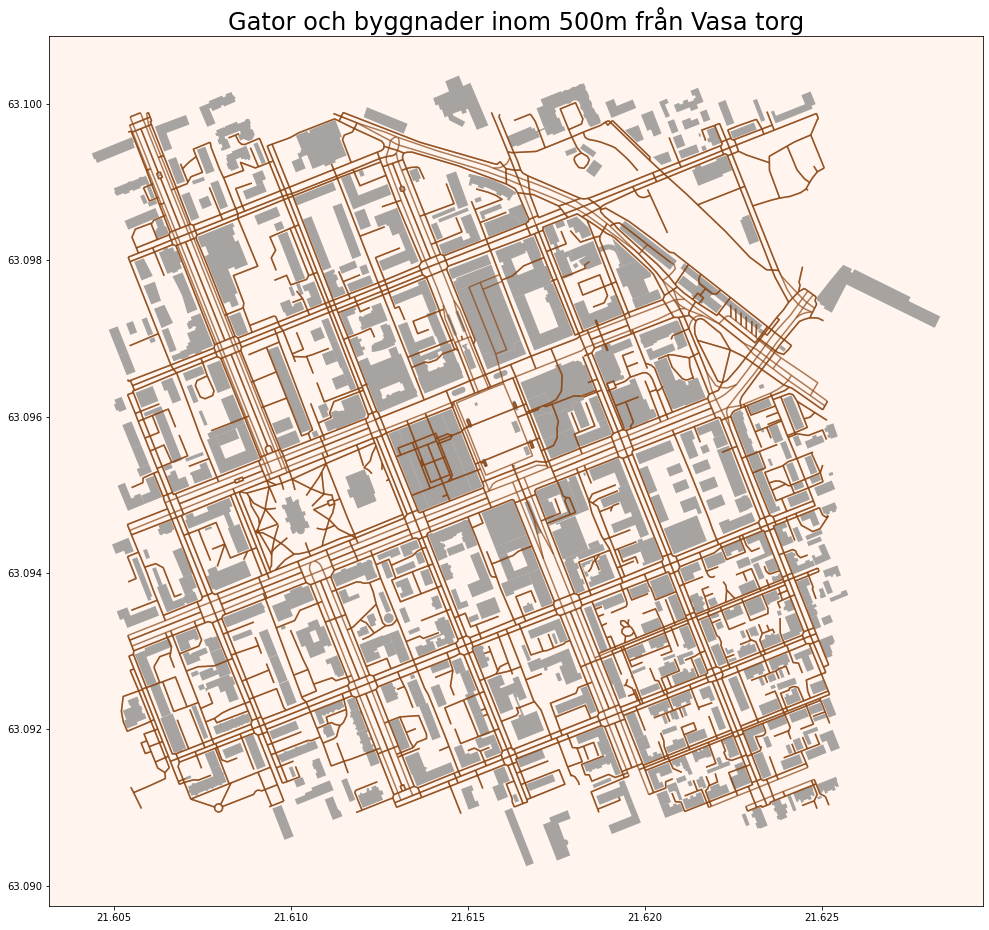

In [42]:
# Vi grundar diagrammet med ett subplots-kommando
fig, ax = plt.subplots(figsize=(24,16)) # Här kan man justera bildstorleken.

# Vi väljer en neutral bakgrundsfärg
ax.set_facecolor('seashell')

# Vi väljer en rubrik för kartan
plt.title('Gator och byggnader inom 500m från Vasa torg', fontsize=24)

# Vi ritar vägnätet. Vi anger axeln ax. parametern alpha gör vägarna lite genomskinliga.
edges.plot(ax=ax, color='saddlebrown', alpha=0.7)

# Vi ritar byggnaderna. Vi anger igen axeln ax, så att de ritas på samma karta som vägarna.
buildings.plot(ax=ax, facecolor='gray', alpha=0.7) 

plt.show() # Visar kartan

Nu har vi redan ritat vägnät och byggnader. Vi kan lägga till parker i bilden. I tabellen är de märkta med taggen "leisure". På den taggen hittar vi mycket annat också, så vi måste rensa informationen lite.

In [43]:
# Vi söker fram alla fritidsmärkta områden med taggen "leisure": True. Vi använder samma adress och avstånd.
leisure = ox.geometries_from_address(address, dist=distance, tags={"leisure":True})

# Variabeln "leisure", som vi skapat, är en tabell. Vi kontrollerar vilka kolumner den innehåller.
leisure.columns

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['geometry', 'brand', 'brand:wikidata', 'brand:wikipedia', 'entrance',
       'leisure', 'name', 'opening_hours:covid19', 'sport', 'source', 'nodes',
       'name:sv', 'surface', 'lit', 'ways', 'type'],
      dtype='object')

I tabellen över fritidsplatser finns en kolumn som heter "leisure". Vi ser vad den innehåller.

In [44]:
print(leisure['leisure'].unique())

['fitness_centre' 'playground' 'park' 'pitch' 'marina']


C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vi kan söka upp platser som lekparker, gym eller parker. Vi vill rita parkerna på kartan, och de hittas förstås om vi söker ordet "park" ur tabellen. Vi skiljer ut dem ur tabellen, och sparar dem i variabeln "parks"

In [45]:
# Vi väljer ut parkerna bland fritidsplatserna. Funktionen .isin(["park"]) söker upp de rader som innehåller ordet park.
parks = leisure[leisure["leisure"].isin(["park"])]

Nu kan vi rita kartan, inklusive parkerna, på samma sätt som tidigare.

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


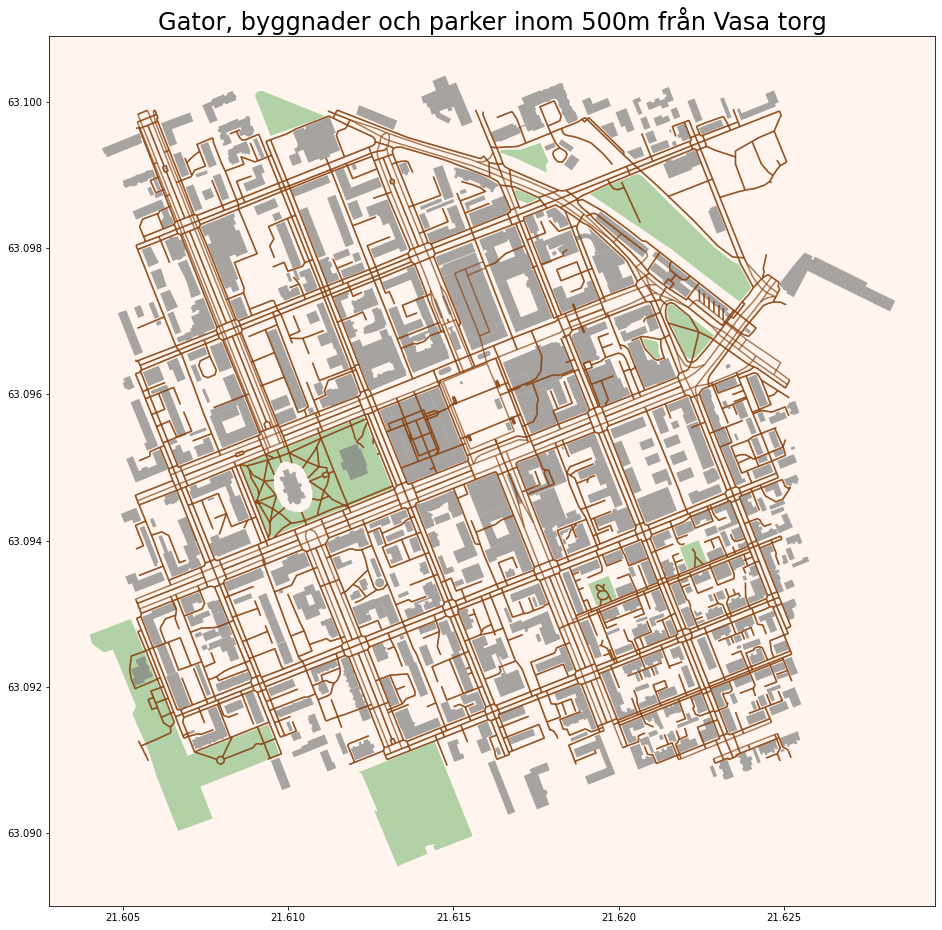

In [50]:

fig, ax = plt.subplots(figsize=(24,16))

ax.set_facecolor('seashell')
plt.title('Gator, byggnader och parker inom 500m från Vasa torg', fontsize=24)

# Vi lägger till parkerna i samma teckning
parks.plot(ax=ax, facecolor='green', alpha=0.3)

# Vi upprepar samma kod som tidigare för att få in vägar och byggnader
edges.plot(ax=ax, color='saddlebrown', alpha=0.7)
buildings.plot(ax=ax, facecolor='gray', alpha=0.7) 


plt.show()

Vi märker att grönområderna går lite utanför den avståndsbegränsning som vi valde i början, och det har gjort kartan lite mindre. Vi kan välja gränser för diagrammet, så att skalan blir samma som tidigare. Vi kan använda [`plt.xlim()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim) och [`plt.ylim()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html?highlight=ylim#matplotlib.pyplot.ylim) för att begränsa kartan. Vi kan se vilka gränser som passar genom att läsa av värdena på kartornas axlar.

C:\Users\Lukas\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


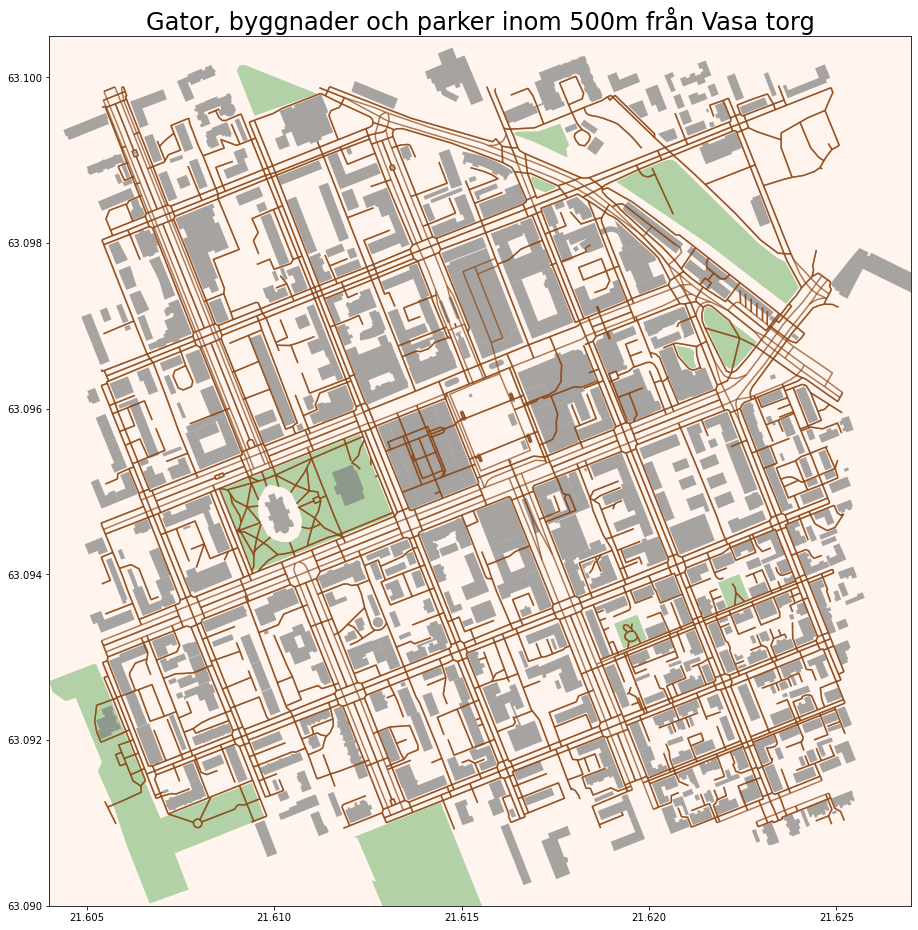

In [59]:
fig, ax = plt.subplots(figsize=(24,16))

ax.set_facecolor('seashell')
plt.title('Gator, byggnader och parker inom 500m från Vasa torg', fontsize=24)

parks.plot(ax=ax, facecolor='green', alpha=0.3)
edges.plot(ax=ax, color='saddlebrown', alpha=0.7)
buildings.plot(ax=ax, facecolor='gray', alpha=0.7) 

# Vi väljer gränser för bilden. De angivna siffrorna är latitud och longitud.
# Se på föregående karta för att hitta passande gränser.
plt.xlim([21.604, 21.627])
plt.ylim([63.090, 63.1005])

plt.show()

Nu är kartan klar. Med den kan vi undersöka vägnätet i Vasa centrum, och vi kan lätt göra samma sak för ett annat område om vi bara ändrar variablerna **address** och **distance** i början, samt gränserna **ylim()** och **xlim()** i den sista kodcellen.

Testa själv att göra en likadan karta över något annat område, eller berika den här kartan med fler markeringar!